In [106]:
import igraph as ig
import pandas as pd
import numpy as np

In [107]:
comments_df = pd.read_csv('../reddit_comments.csv')

In [108]:
post_id_color = {}
post_id_title = {}
np.random.seed(0)
color_list = ['yellow', 'green', 'blue', 'red', 'purple', 'orange', 'pink', 'brown']
i = 0
for post_id in comments_df['post_id'].unique():
    post_id_color[post_id] = color_list[i]
    post_id_title[post_id] = comments_df[comments_df['post_id'] == post_id].iloc[0]['post_title'][0:20]
    i += 1
print(post_id_color)
print(post_id_title)

{'17z2hci': 'yellow', '1bulhj9': 'green', '1b6cg4q': 'blue', '17lese9': 'red', '1cwqkqe': 'purple', '10v8sey': 'orange', '197vo6o': 'pink', '1d5h5h6': 'brown'}
{'17z2hci': 'Ho visto troppi post', '1bulhj9': 'Il problema del cald', '1b6cg4q': 'Possibile guerra NAT', '17lese9': '4000 bambini morti i', '1cwqkqe': 'Chi voterete alle eu', '10v8sey': 'Natura sì: niente ci', '197vo6o': 'Altre nubi sui Ferra', '1d5h5h6': 'Boom di giovani in f'}


In [109]:
# Creiamo il grafo originale con tutti i nodi e archi
g = ig.Graph(directed=True)
g.add_vertex(name=comments_df.iloc[0]['comment_parent_id'], color='black', label = comments_df.iloc[0]['comment_parent_name'], post_id=comments_df.iloc[0]['post_id'])

for comment in comments_df.iloc[1:].iterrows():
    author_id = comment[1]['comment_author_id']
    author_name = comment[1]['comment_author_name']
    parent_id = comment[1]['comment_parent_id']
    post_id = comment[1]['post_id']
    comment_score = int(comment[1]['comment_score'])
    color = post_id_color[post_id]
    
    if author_id not in g.vs['name']:
        if parent_id in g.vs['name']:
            g.add_vertex(name=author_id, color=color, post_id=post_id, label=author_name)
            g.add_edge(author_id, parent_id, weight=comment_score)
    else:
        if parent_id in g.vs['name'] and parent_id != author_id:
            g.add_edge(author_id, parent_id, weight=comment_score)

g.delete_vertices(['0'])
ig.plot(g, bbox=(0, 0, 800, 800), vertex_size=10)

### Pulizia dei grafi

In [110]:
post_graphs = {}
for post_id in set(g.vs['post_id']):
    post_vertices = [v.index for v in g.vs if v['post_id'] == post_id]
    subgraph = g.subgraph(post_vertices)    
    post_graphs[post_id] = subgraph

In [111]:
graph = post_graphs.popitem()[1]

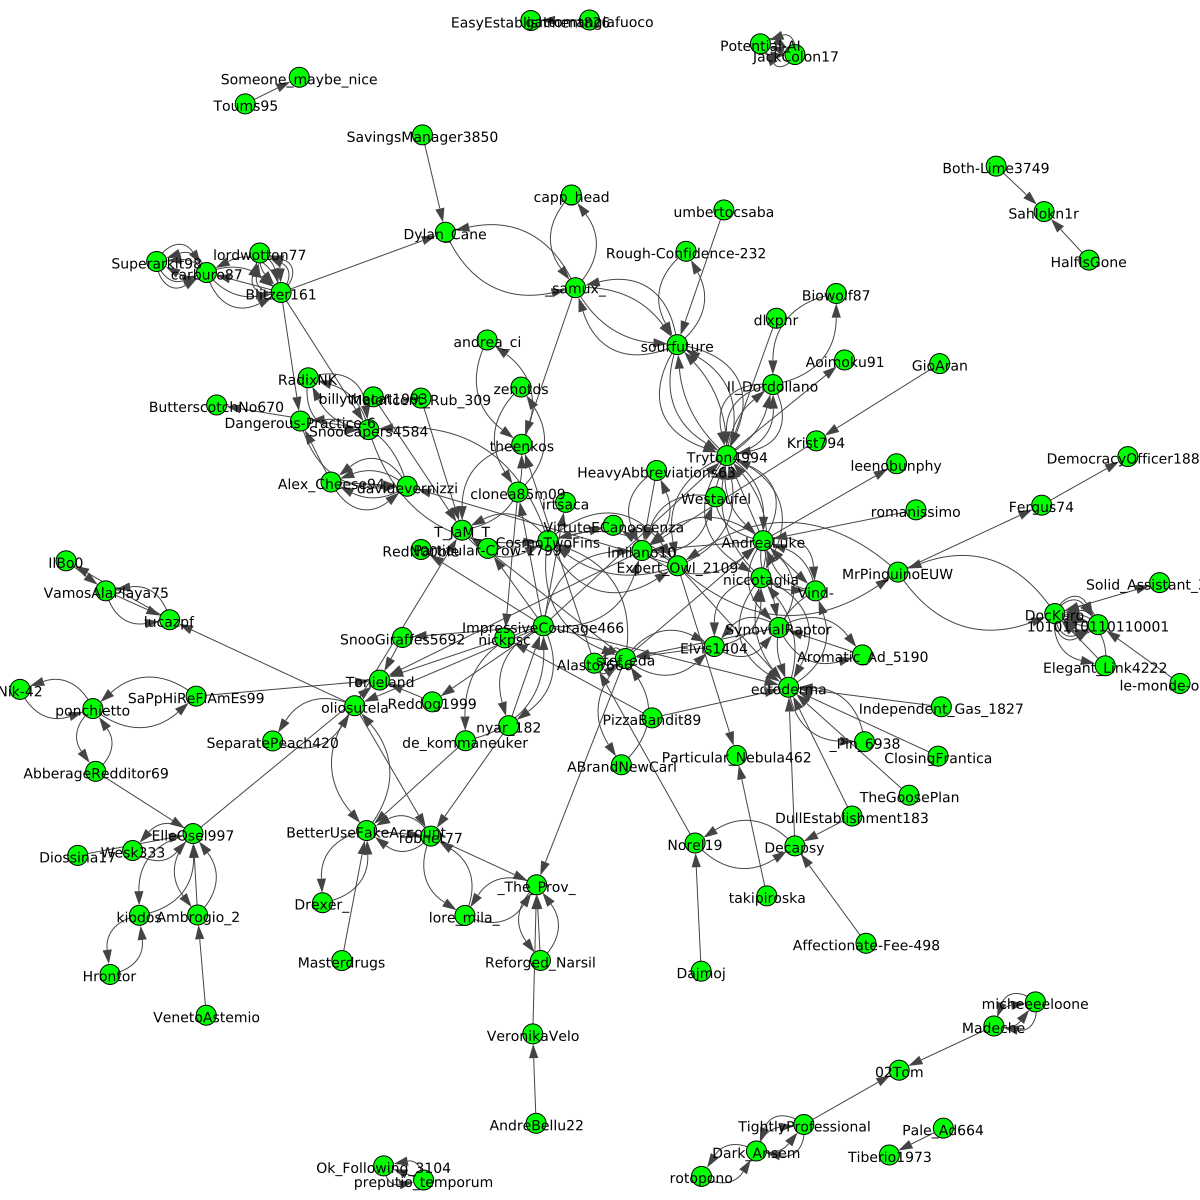

In [112]:
deleted_vertices = []
for v in graph.vs:
    if v.neighbors() == []:
        deleted_vertices.append(v)

graph.delete_vertices(deleted_vertices)
graph.layout("kk")
ig.plot(graph, bbox=(0, 0, 1200, 1200), vertex_size=20)

# Graph-Centric
## Density

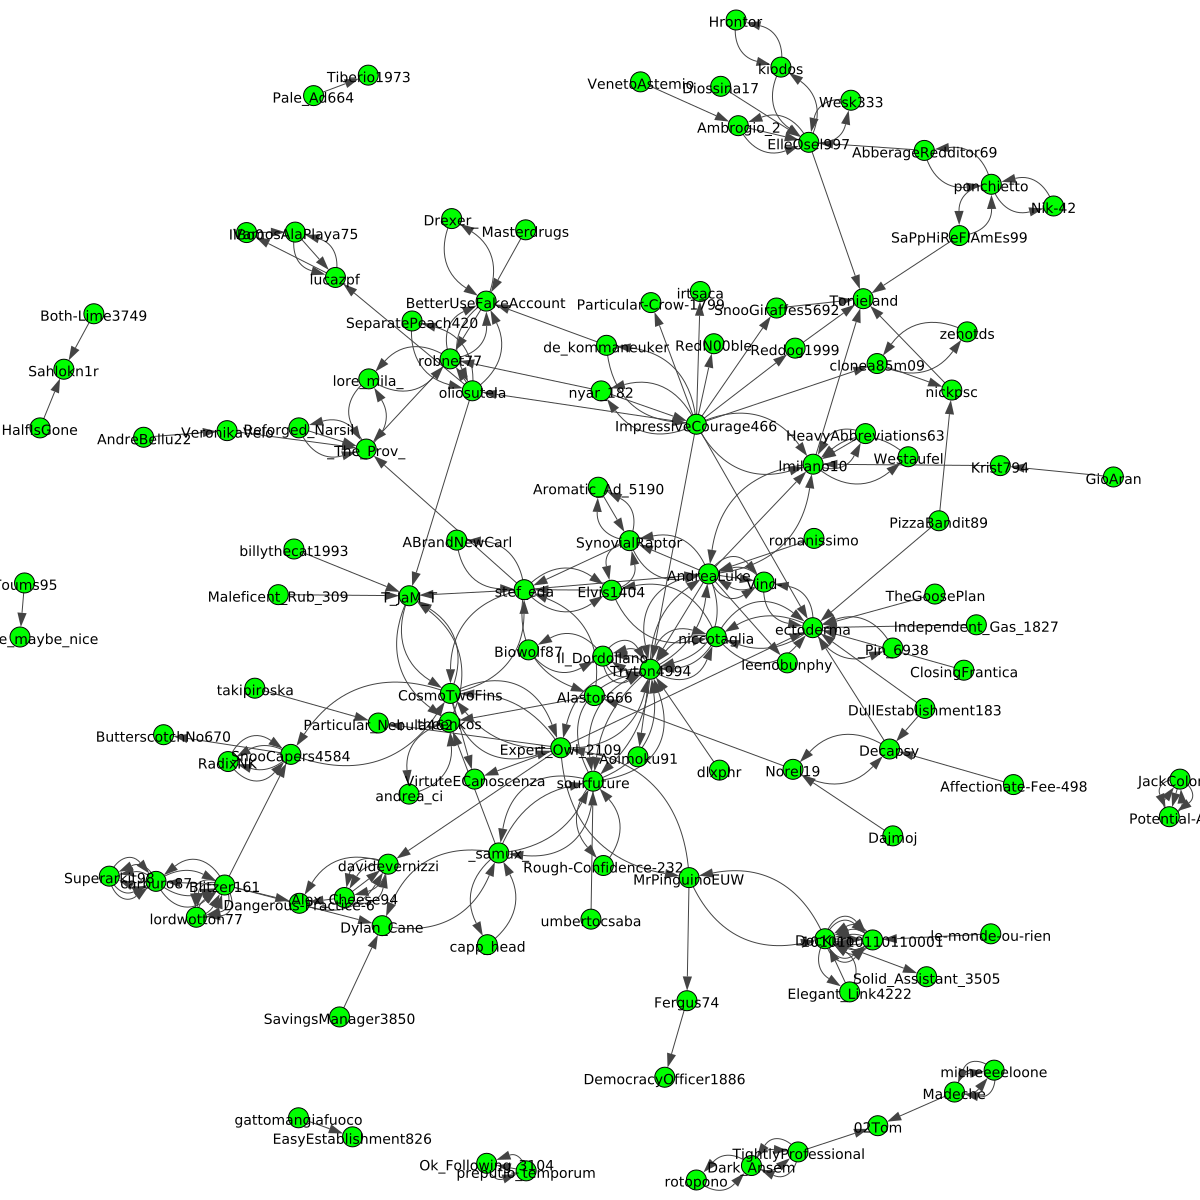

In [113]:
new_graph = graph.copy()
deleted_vertices = []
is_to_delete = False
for vertex in new_graph.vs:
    for v in vertex.neighbors():
        if new_graph.es.select(_source=vertex.index, _target=v.index):
            is_to_delete = is_to_delete and True            # Se esiste un arco uscente
        else:      
            is_to_delete = is_to_delete and False       # Se non esiste un arco uscente
        new_graph.delete_edges(new_graph.es.select(_source=vertex.index, _target=v.index))
    if is_to_delete:
        deleted_vertices.append(vertex)

graph.delete_vertices(deleted_vertices)
graph.layout("kk")
ig.plot(graph, bbox=(0, 0, 1200, 1200), vertex_size=20)